# <h1 align="center"> <font color = 'purple' > WITCH DOCTOR  </font> </h1>  <br> 

***
<img src = https://media.moddb.com/cache/images/mods/1/24/23383/thumb_620x2000/10.jpg >





<font color = "green" > Insight Generation by Charts a Jupyter Notebook with full of graphs and analysis. (Bokeh, Matplotlib) - "Witch Doctor" </font> 




In [195]:
#DataBase Connection for Clickhouse
from clickhouse_driver import Client 

client = Client(host='34.70.65.12', 
                    user = "", 
                    password = "", 
                    database = "")

#DataBase Connection for PostgresSQL
import psycopg2 

connection = psycopg2.connect(user = "",
                                  password = "",
                                  host = "35.242.171.74",
                                  port = "5432",
                                  database = "")

cursor = connection.cursor()

In [196]:
#Required Libraries 
import matplotlib.pyplot as plt 


import numpy as np 
import pandas as pd 
import bokeh 

#Additional Magics 
%config IPCompleter.greedy=True
%matplotlib inline 

In [6]:
#Begin Charting with Explanations underneath the Chart 

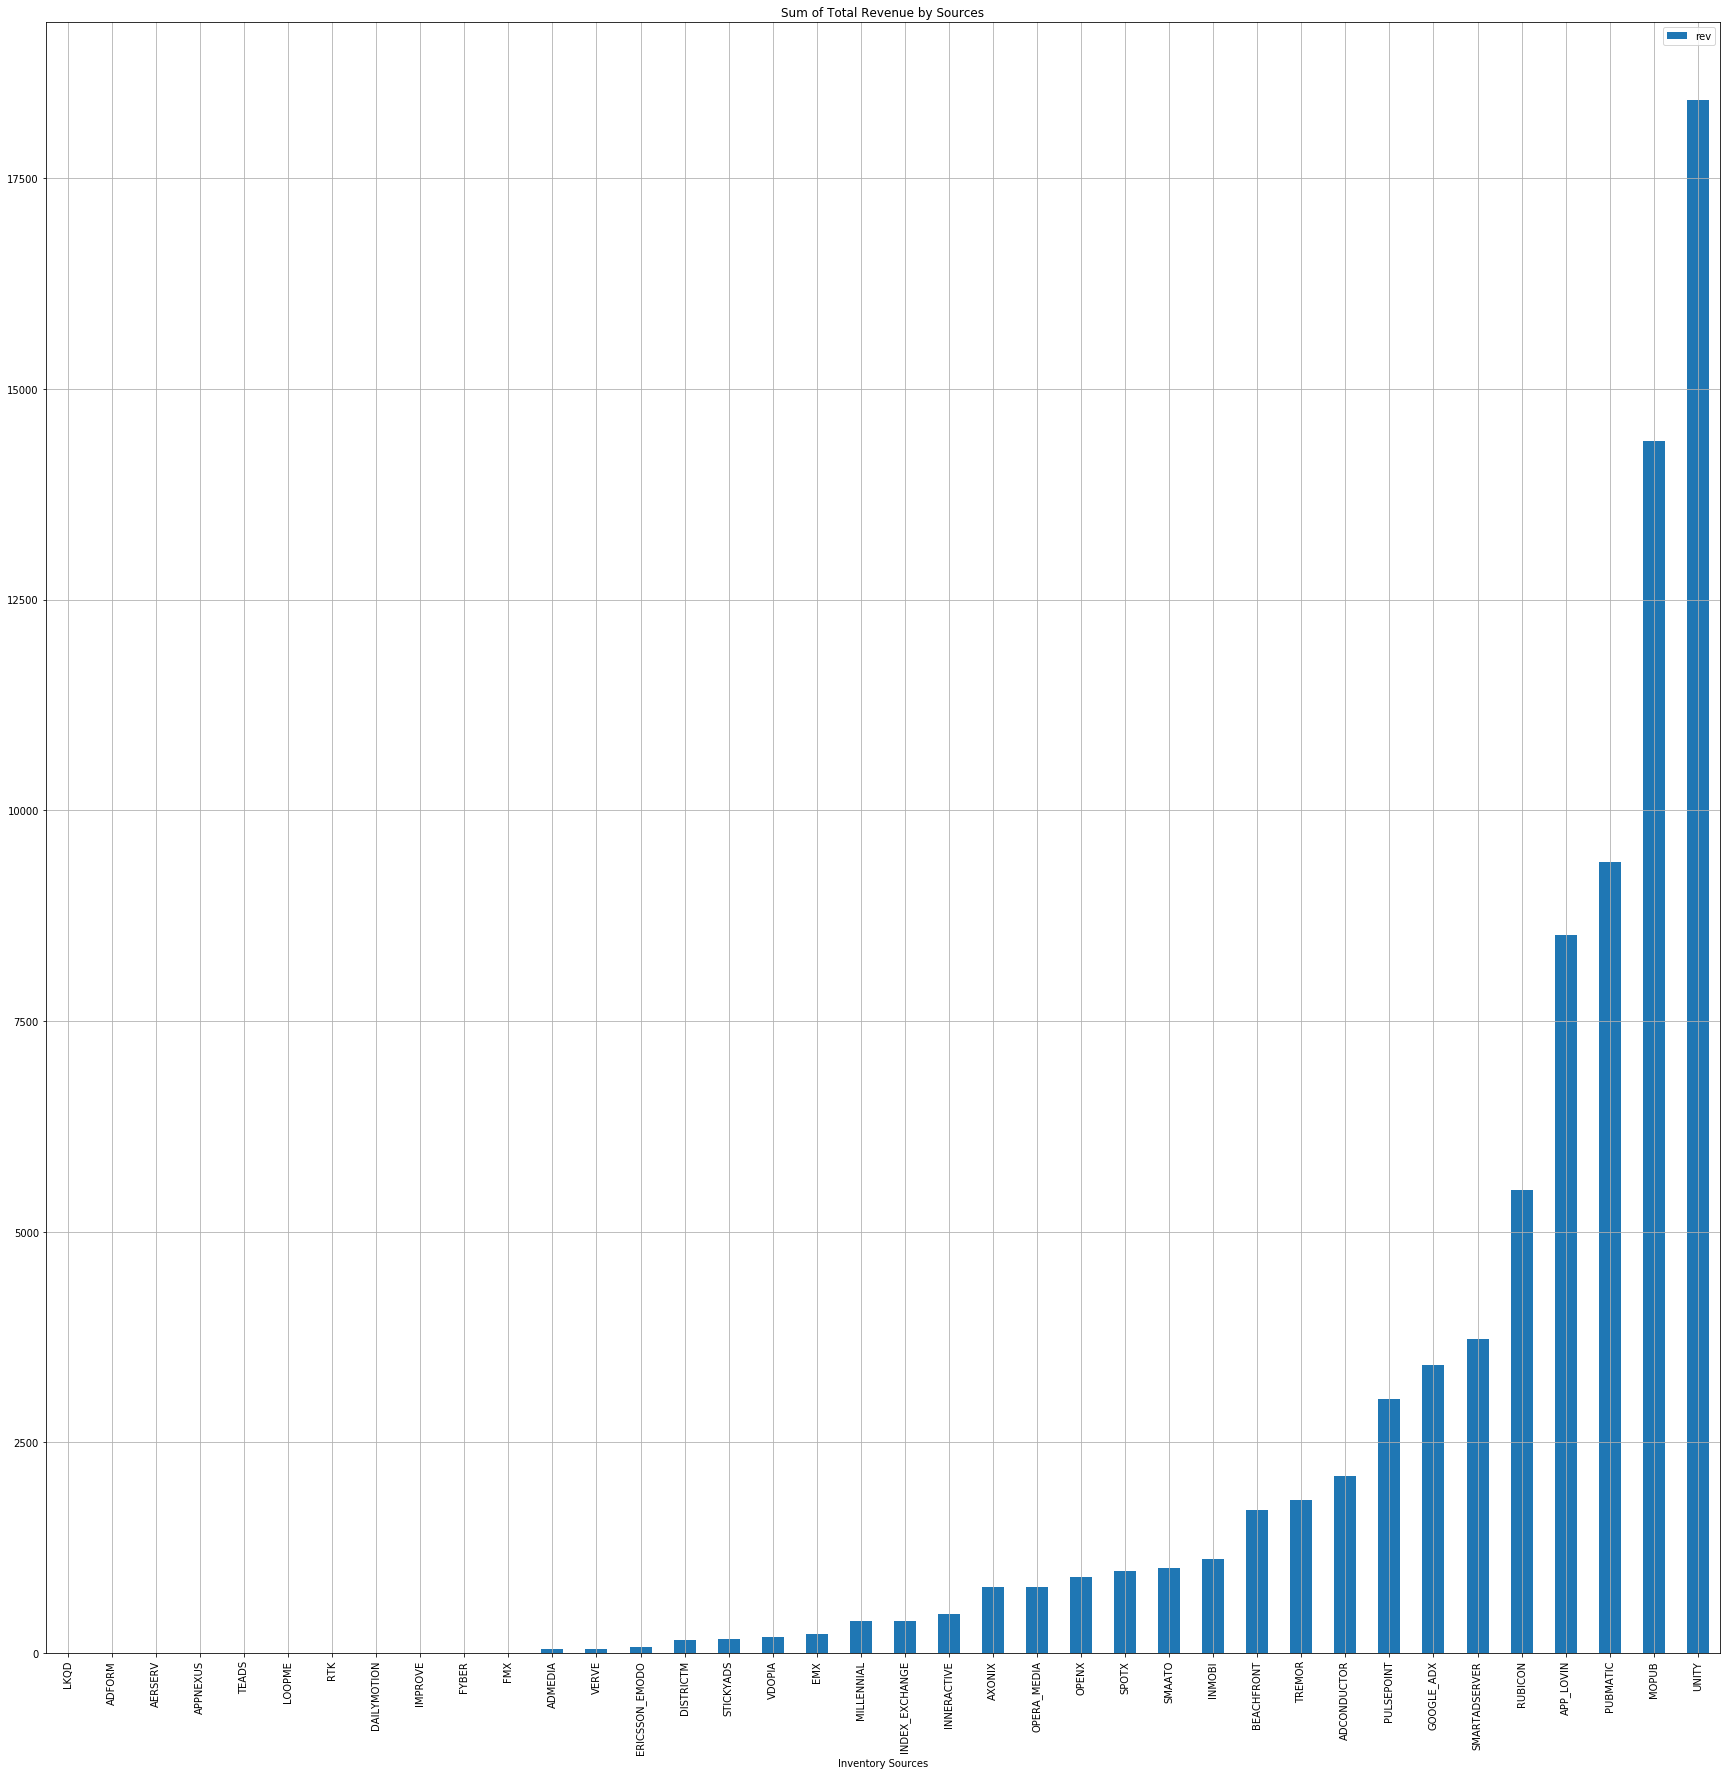

In [58]:
plt.rcParams['figure.figsize'] = [30, 30]
revenue_inventory = pd.read_sql_query("select inventory_source as source,sum(revenue) as rev from dbo.rtb_wins_analysis group by inventory_source",connection)
sorte_rev = revenue_inventory.sort_values(by = ["rev"])
sorte_rev.plot(kind ="bar", x = "source", y ="rev" )
plt.title("Sum of Total Revenue by Sources")
plt.xlabel("Inventory Sources")
plt.grid()
plt.show()

In [67]:
result, columns = client.execute(" SELECT toDate(bid_time) as dater, SUM(win_cost_micros)/(count(*)*1000) as cpm from OrionLead.Wins where bid_time > '2019-11-01 00:00:00' and line_item_id = 94 group by dater", with_column_types=True)
df2 = pd.DataFrame(result, columns=[tuple[0] for tuple in columns])
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models.widgets import TextInput, Button
from bokeh.plotting import figure, curdoc, show
from bokeh.layouts import row, widgetbox
output_notebook()
hover = HoverTool(tooltips=[
    ("Date", "@dater"),
    ("Bid Price", "@cpm")
    ])

price_plot = figure(plot_width=1000, plot_height=700, x_axis_type='datetime', title="Bid Price", tools =[hover, 'wheel_zoom'])


price_plot.line(source= df2, x='dater', y='cpm')
price_plot.xaxis.axis_label = "Date"
price_plot.yaxis.axis_label = "Bid Price"


show(price_plot)

Error on 34.70.65.12:9000 ping: Unexpected EOF while reading bytes
Connection was closed, reconnecting.


Loading BokehJS ...

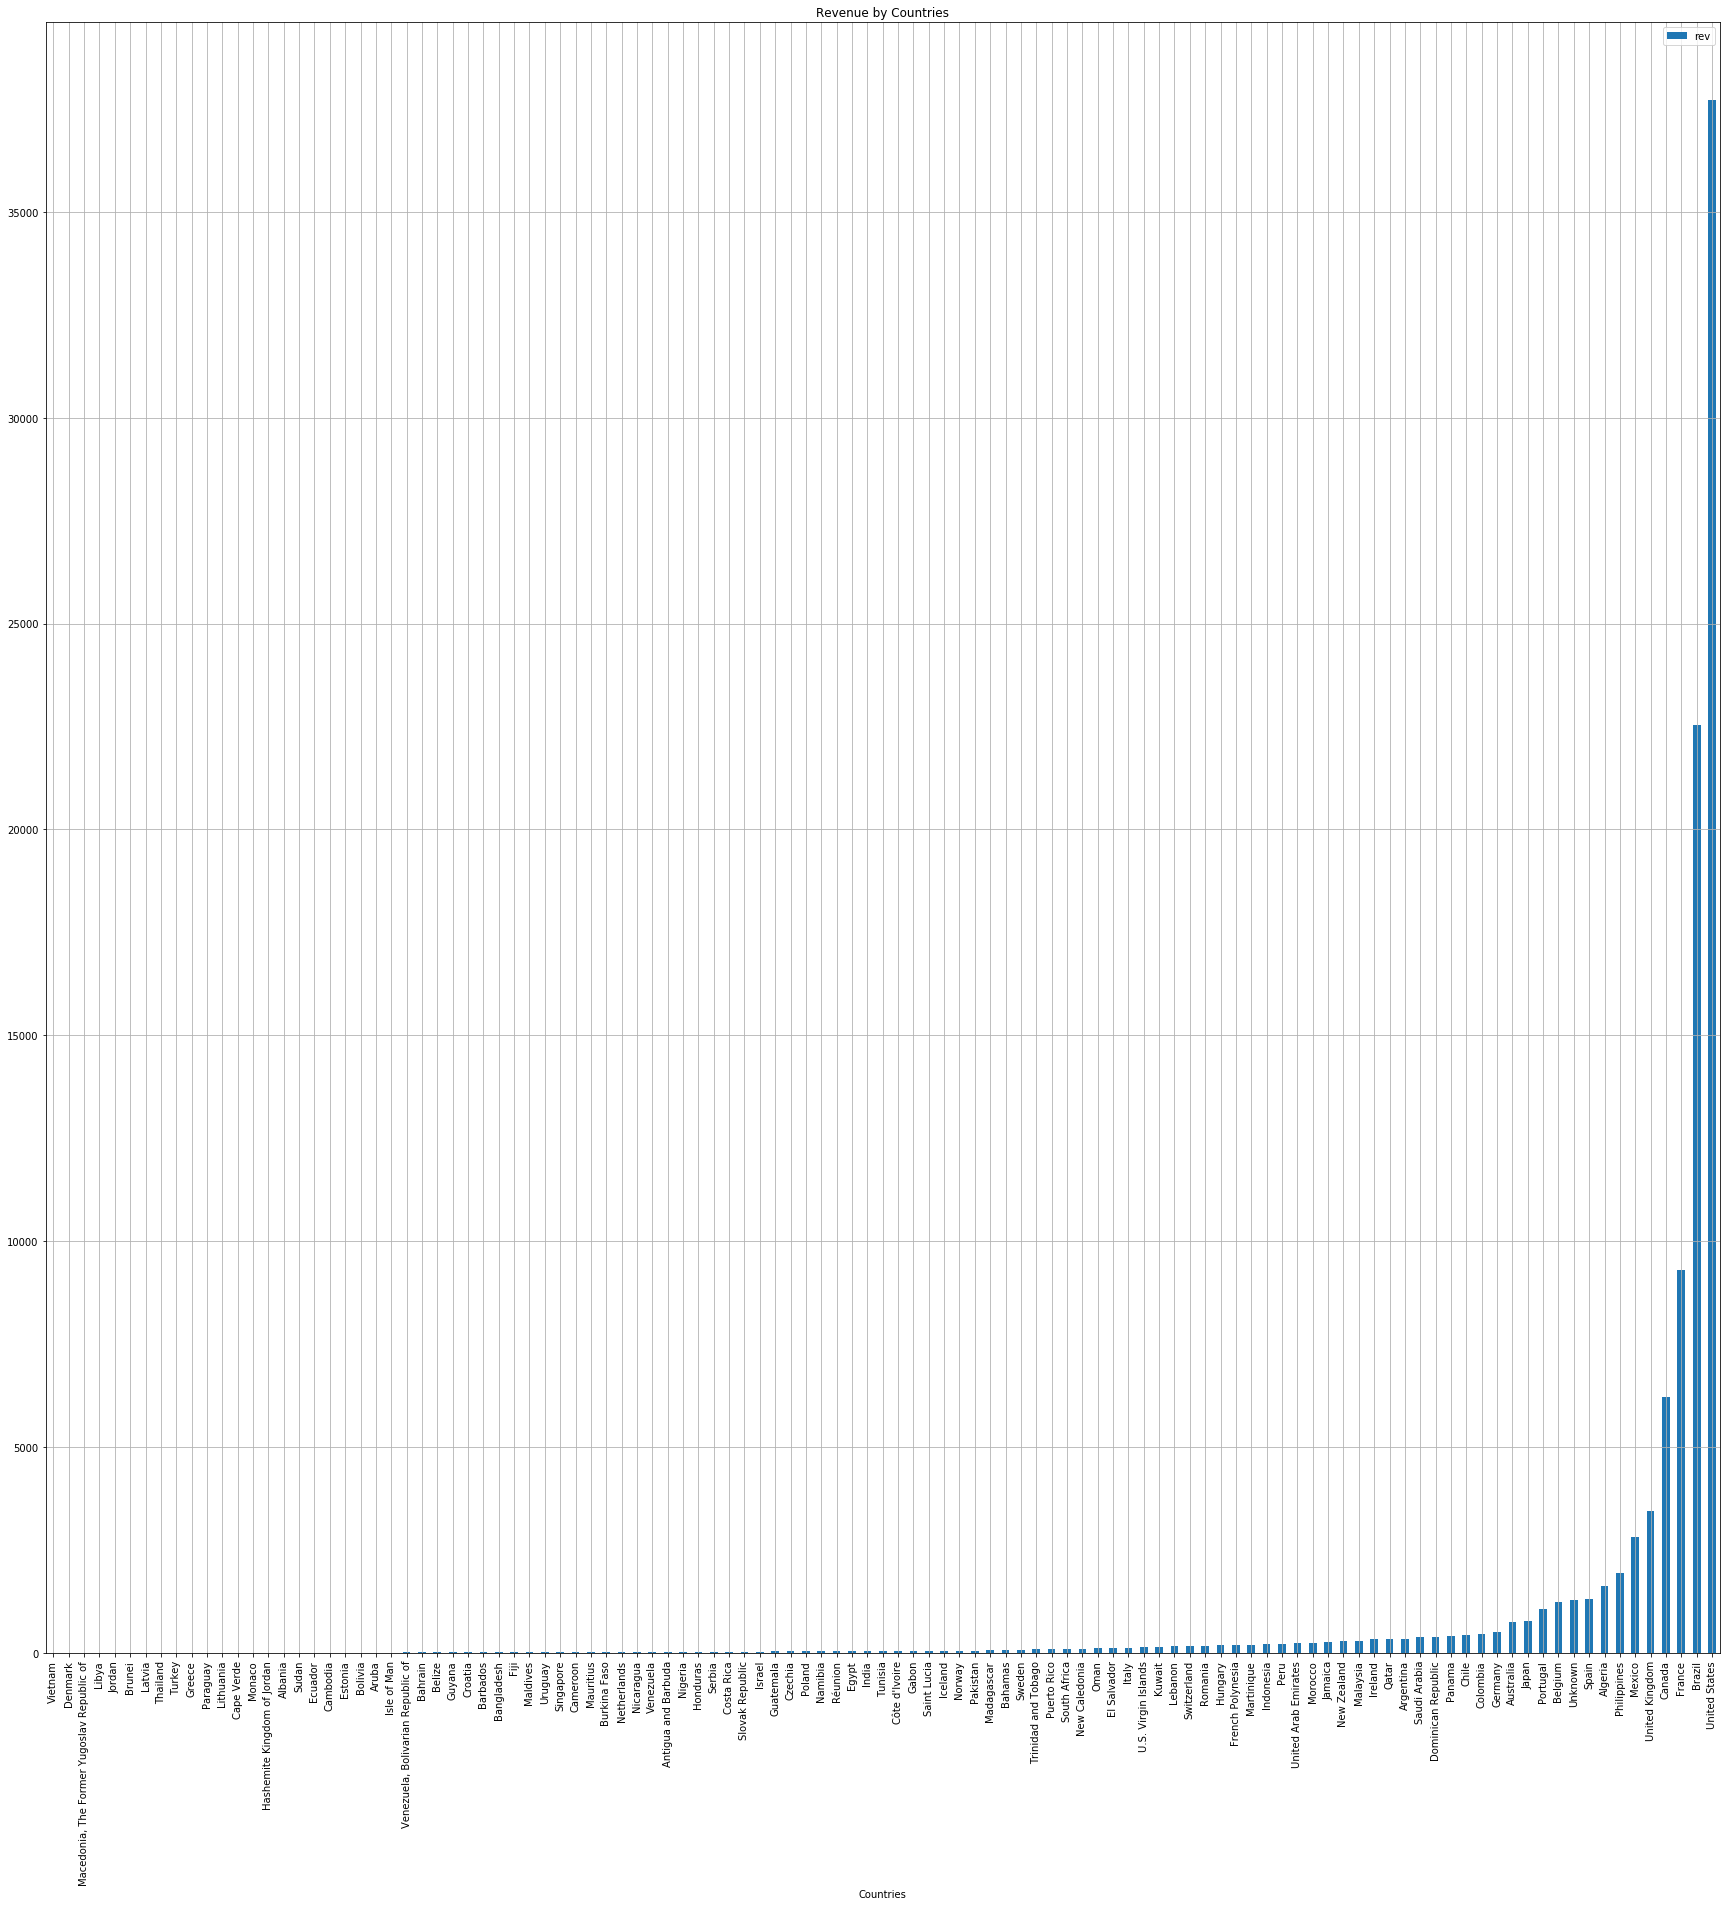

In [59]:
revenue_region = pd.read_sql_query("select region, sum(revenue) as rev from dbo.rtb_user_activity where revenue > 0 group by region", connection)
sorted_region = revenue_region.sort_values(by = ["rev"])
sorted_region.plot(kind ="bar", x = "region", y ="rev")
plt.title("Revenue by Countries")
plt.xlabel("Countries")
plt.grid()
plt.show()

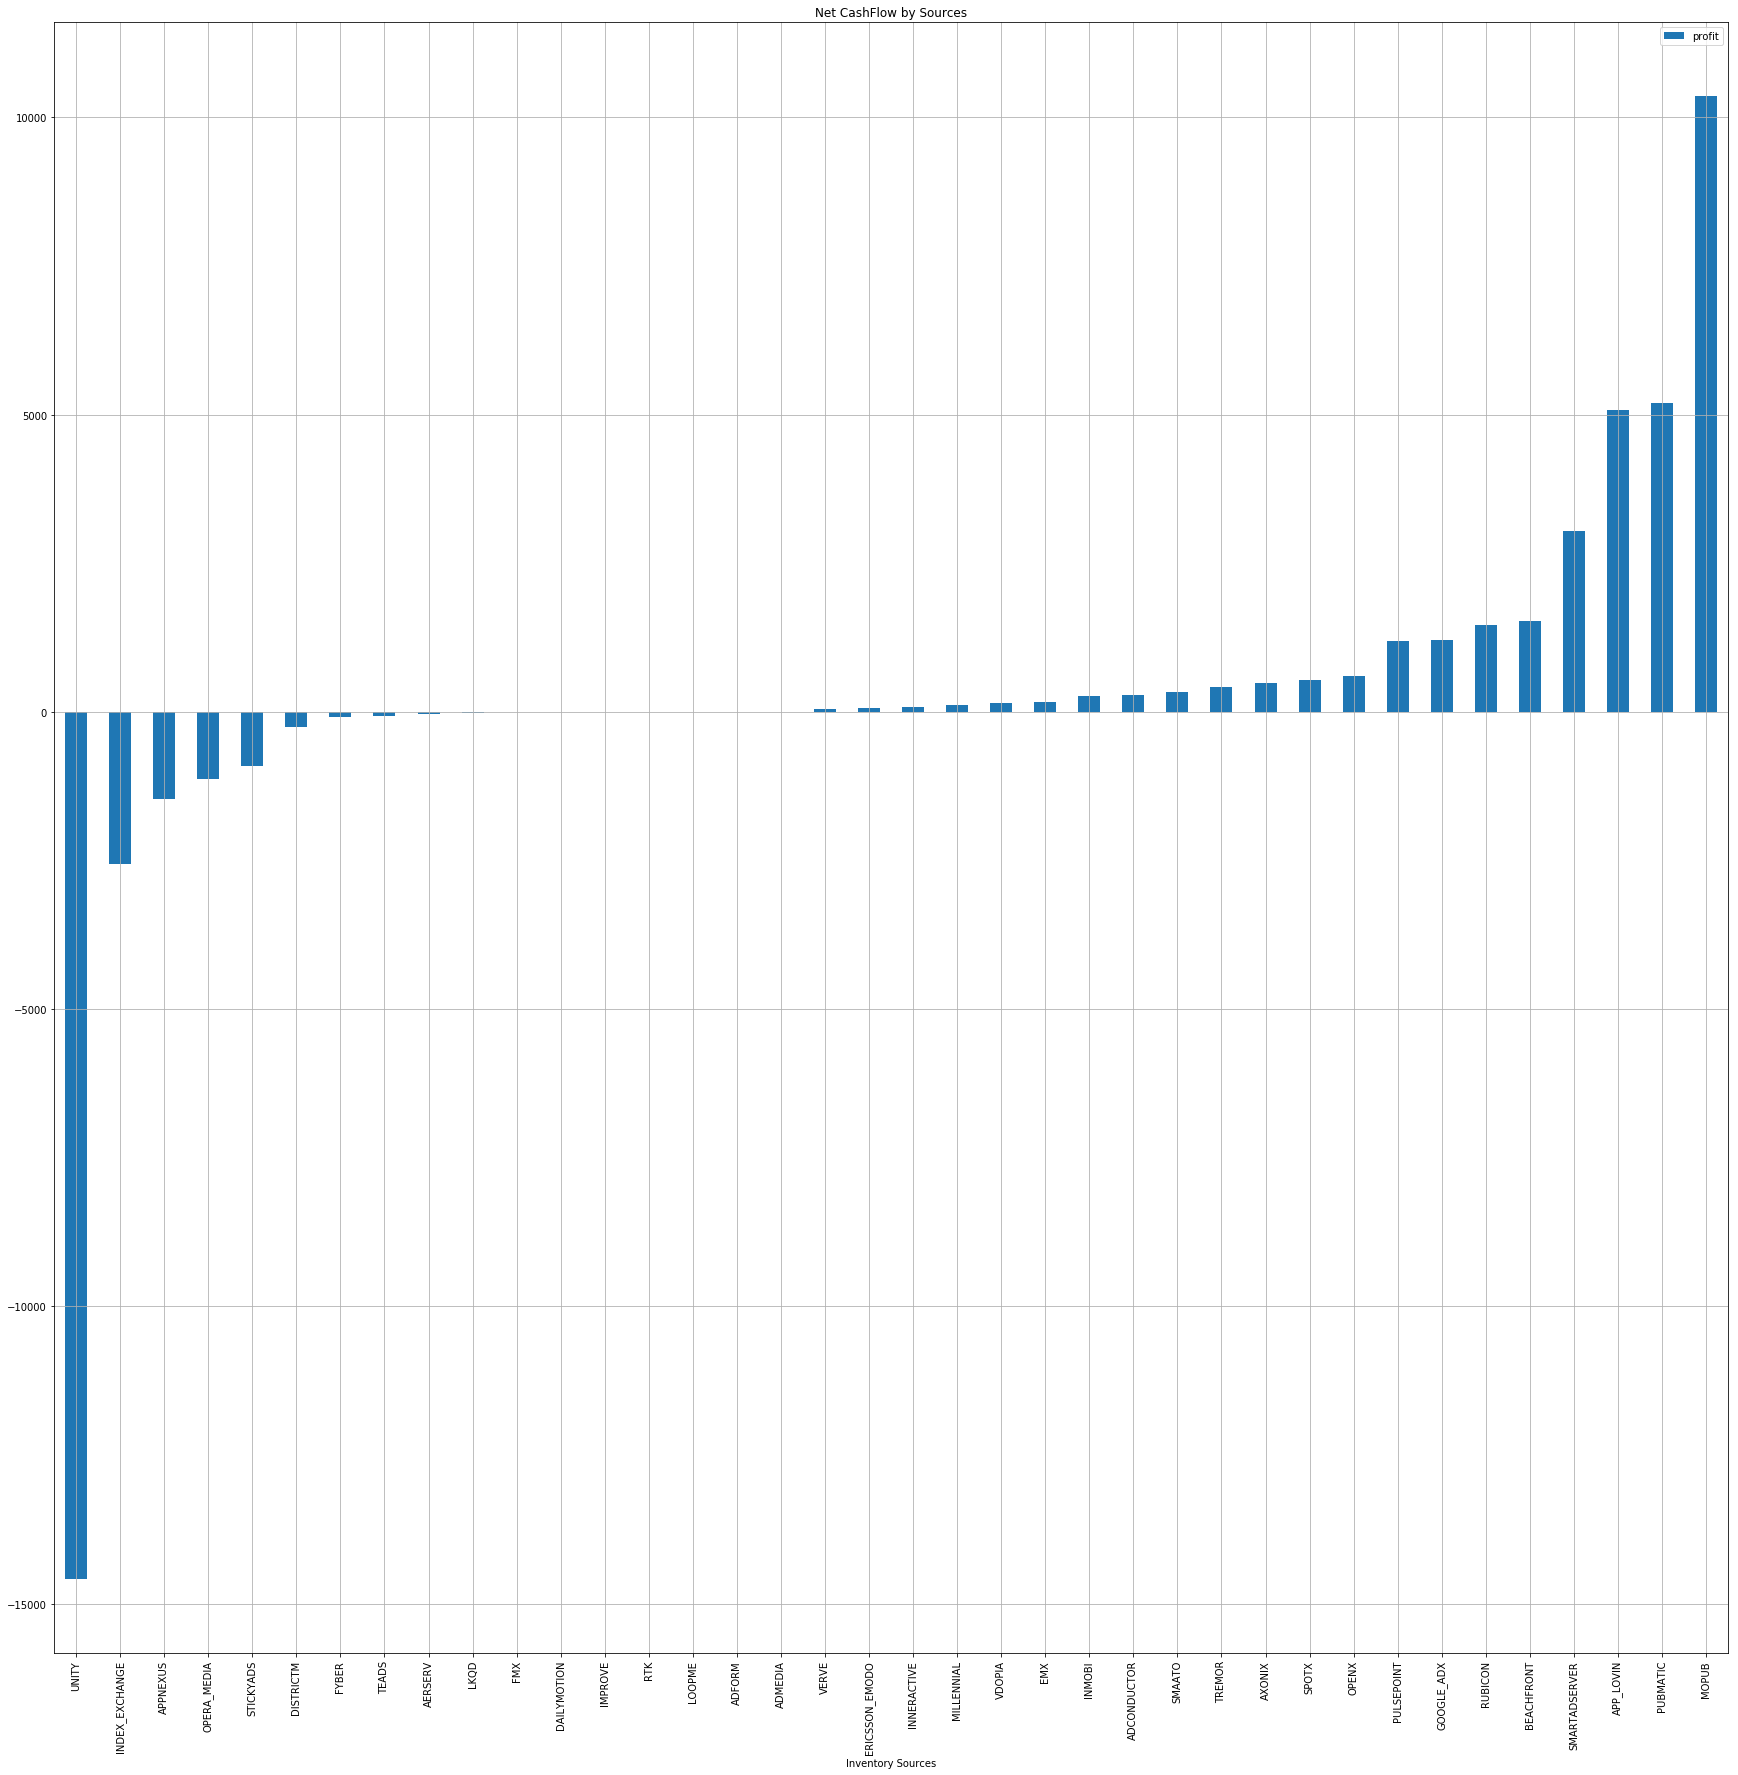

In [60]:
profit_inventory = pd.read_sql_query("select inventory_source,sum(revenue - spending) as profit from dbo.rtb_wins_analysis group by inventory_source",connection)
sorted_profit = profit_inventory.sort_values(by = ["profit"])
sorted_profit.plot(kind ="bar", x = "inventory_source", y ="profit")
plt.title("Net CashFlow by Sources")
plt.xlabel("Inventory Sources")
plt.grid()
plt.show()

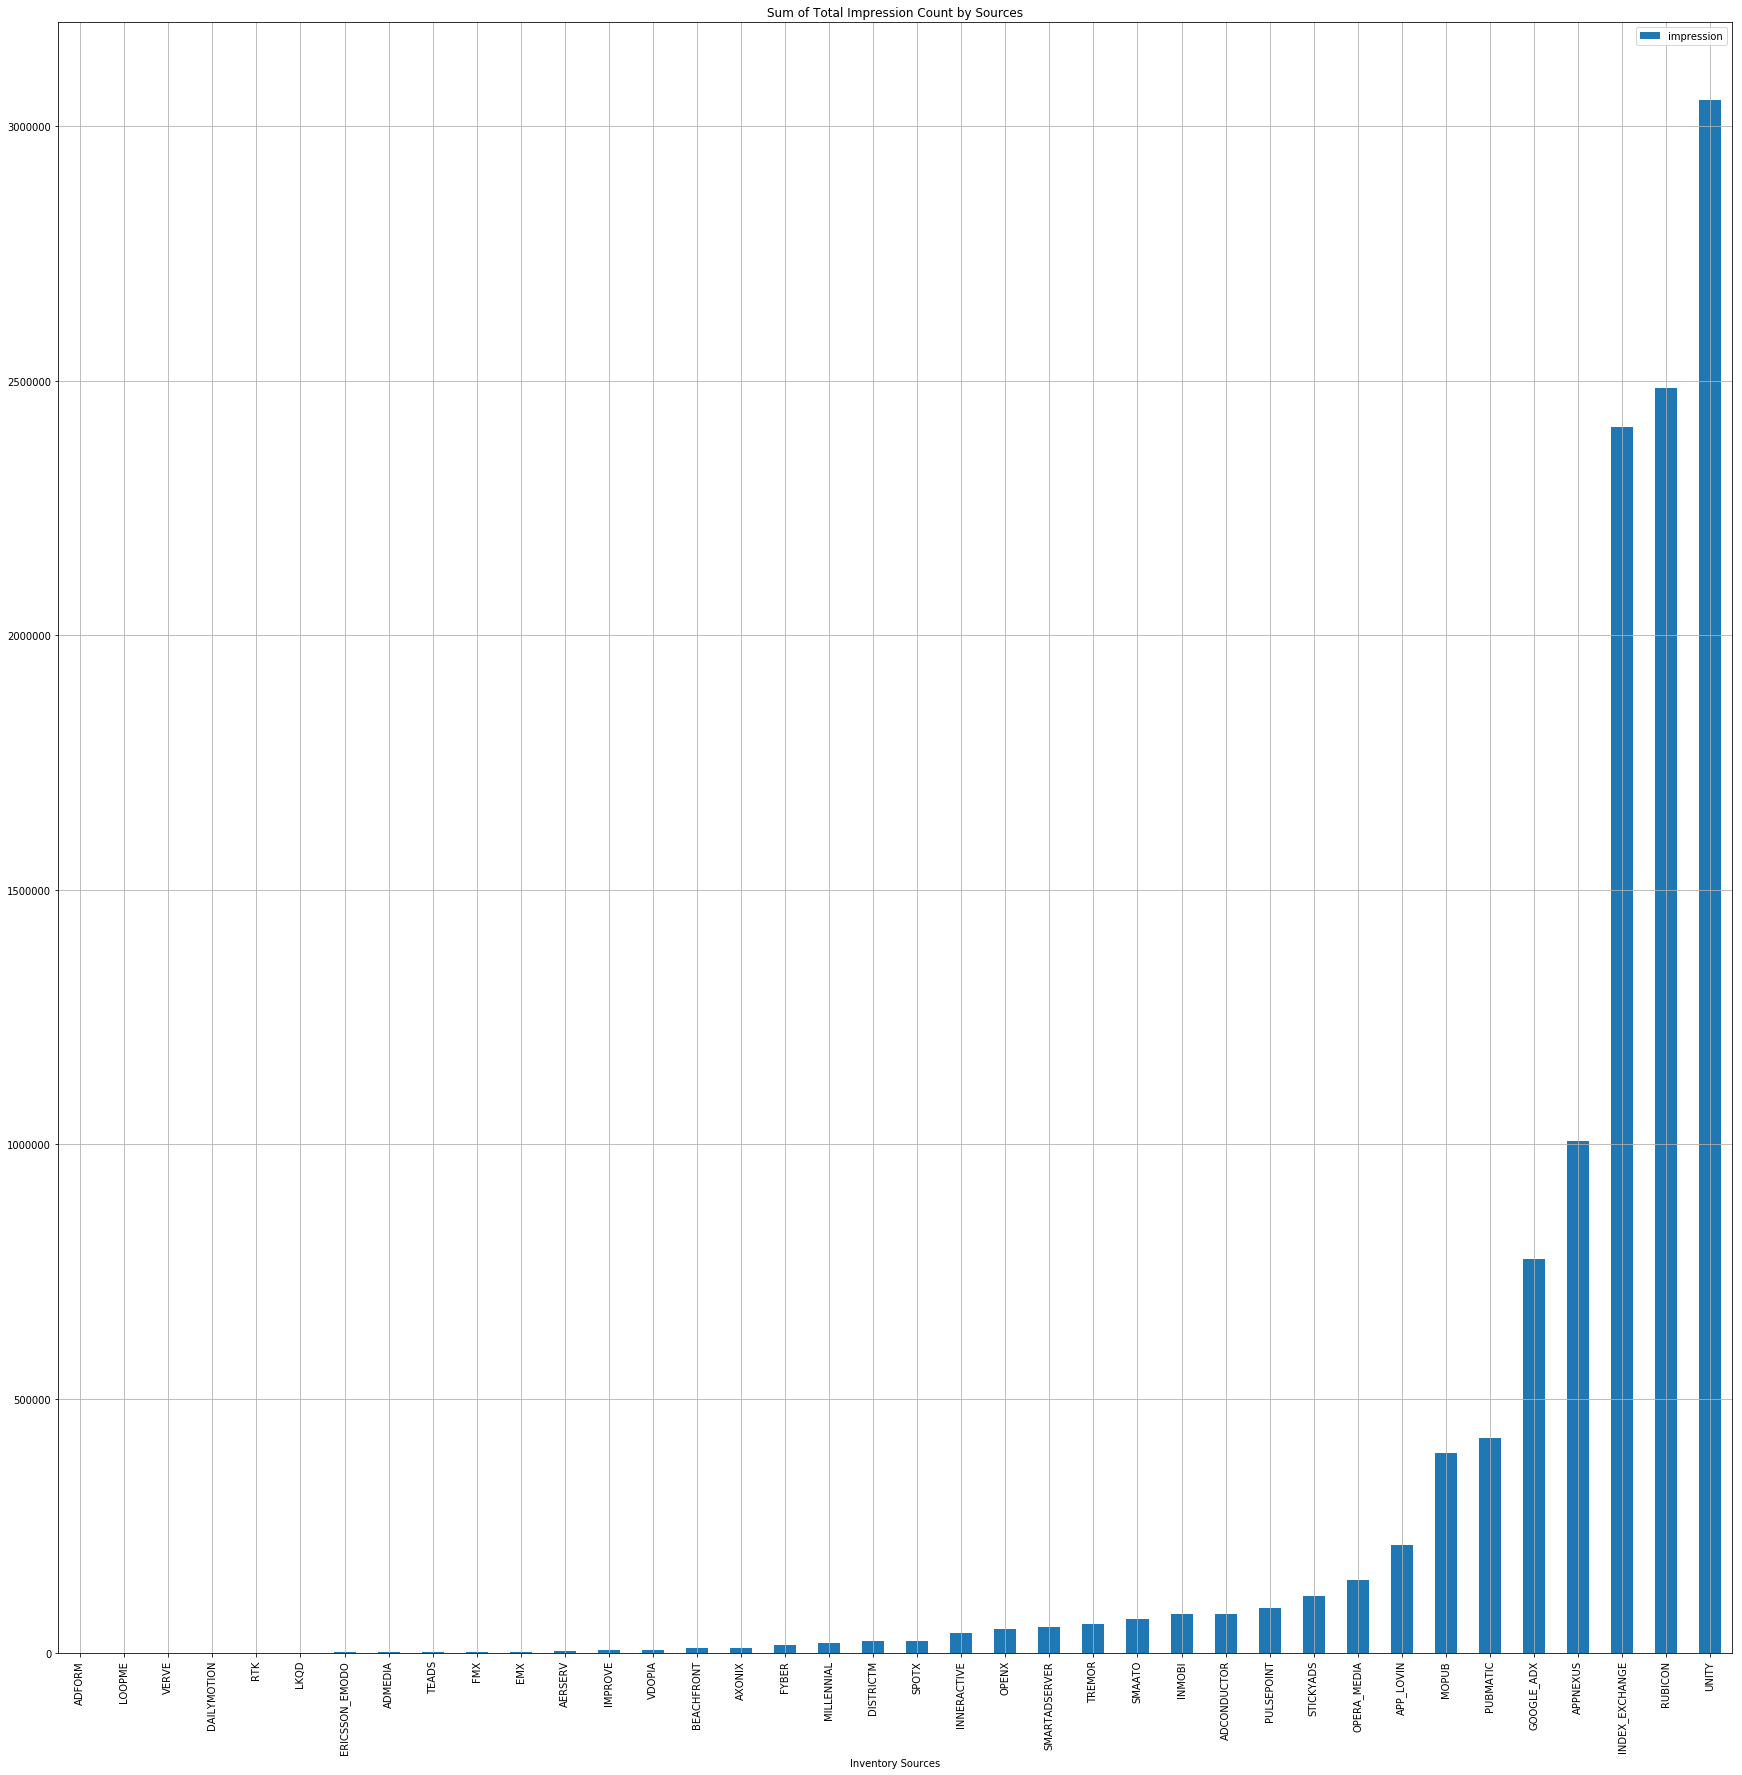

In [62]:
impression_inventory = pd.read_sql_query("select inventory_source,sum(impression_count) as impression from dbo.rtb_wins_analysis group by inventory_source",connection)
sorted_impression = impression_inventory.sort_values(by = ["impression"])
sorted_impression.plot(kind ="bar", x = "inventory_source", y ="impression")
plt.title("Sum of Total Impression Count by Sources")
plt.xlabel("Inventory Sources")
plt.grid()
plt.show()

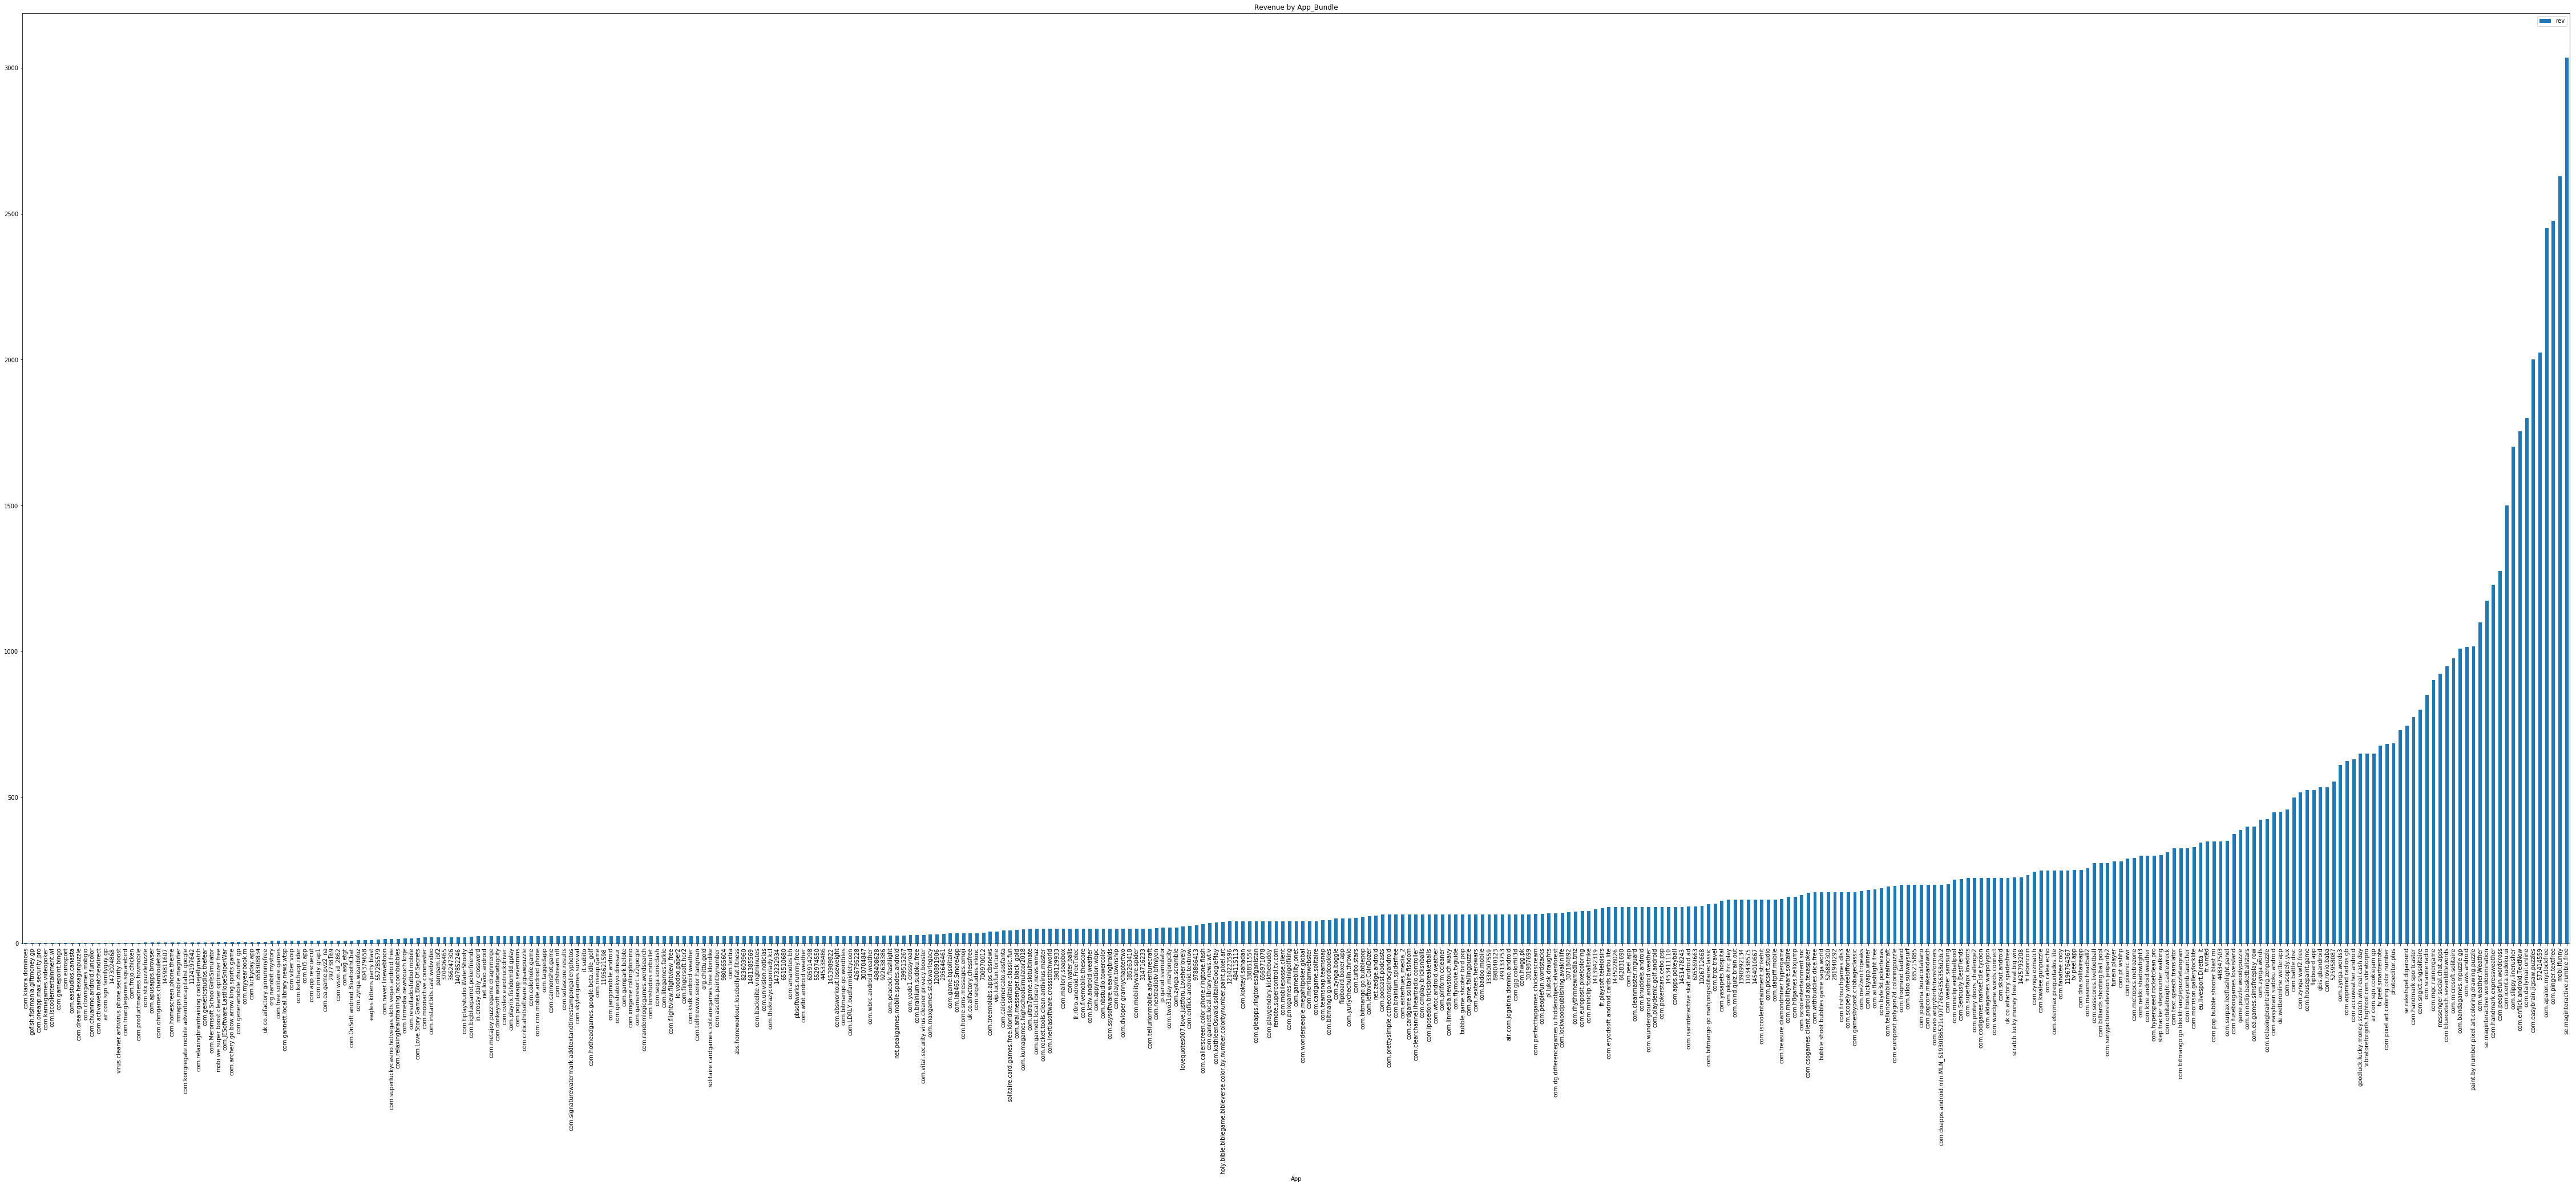

In [71]:
plt.rcParams['figure.figsize'] = [80, 30]
app_revenue = pd.read_sql_query("select app_bundle,sum(revenue) as rev from dbo.rtb_wins_analysis where revenue > 0 group by app_bundle ", connection)
sorted_app = app_revenue.sort_values(by = ["rev"])
sorted_app.plot(kind ="bar", x = "app_bundle", y ="rev")

plt.title("Revenue by App_Bundle")
plt.xlabel("App")
plt.show()

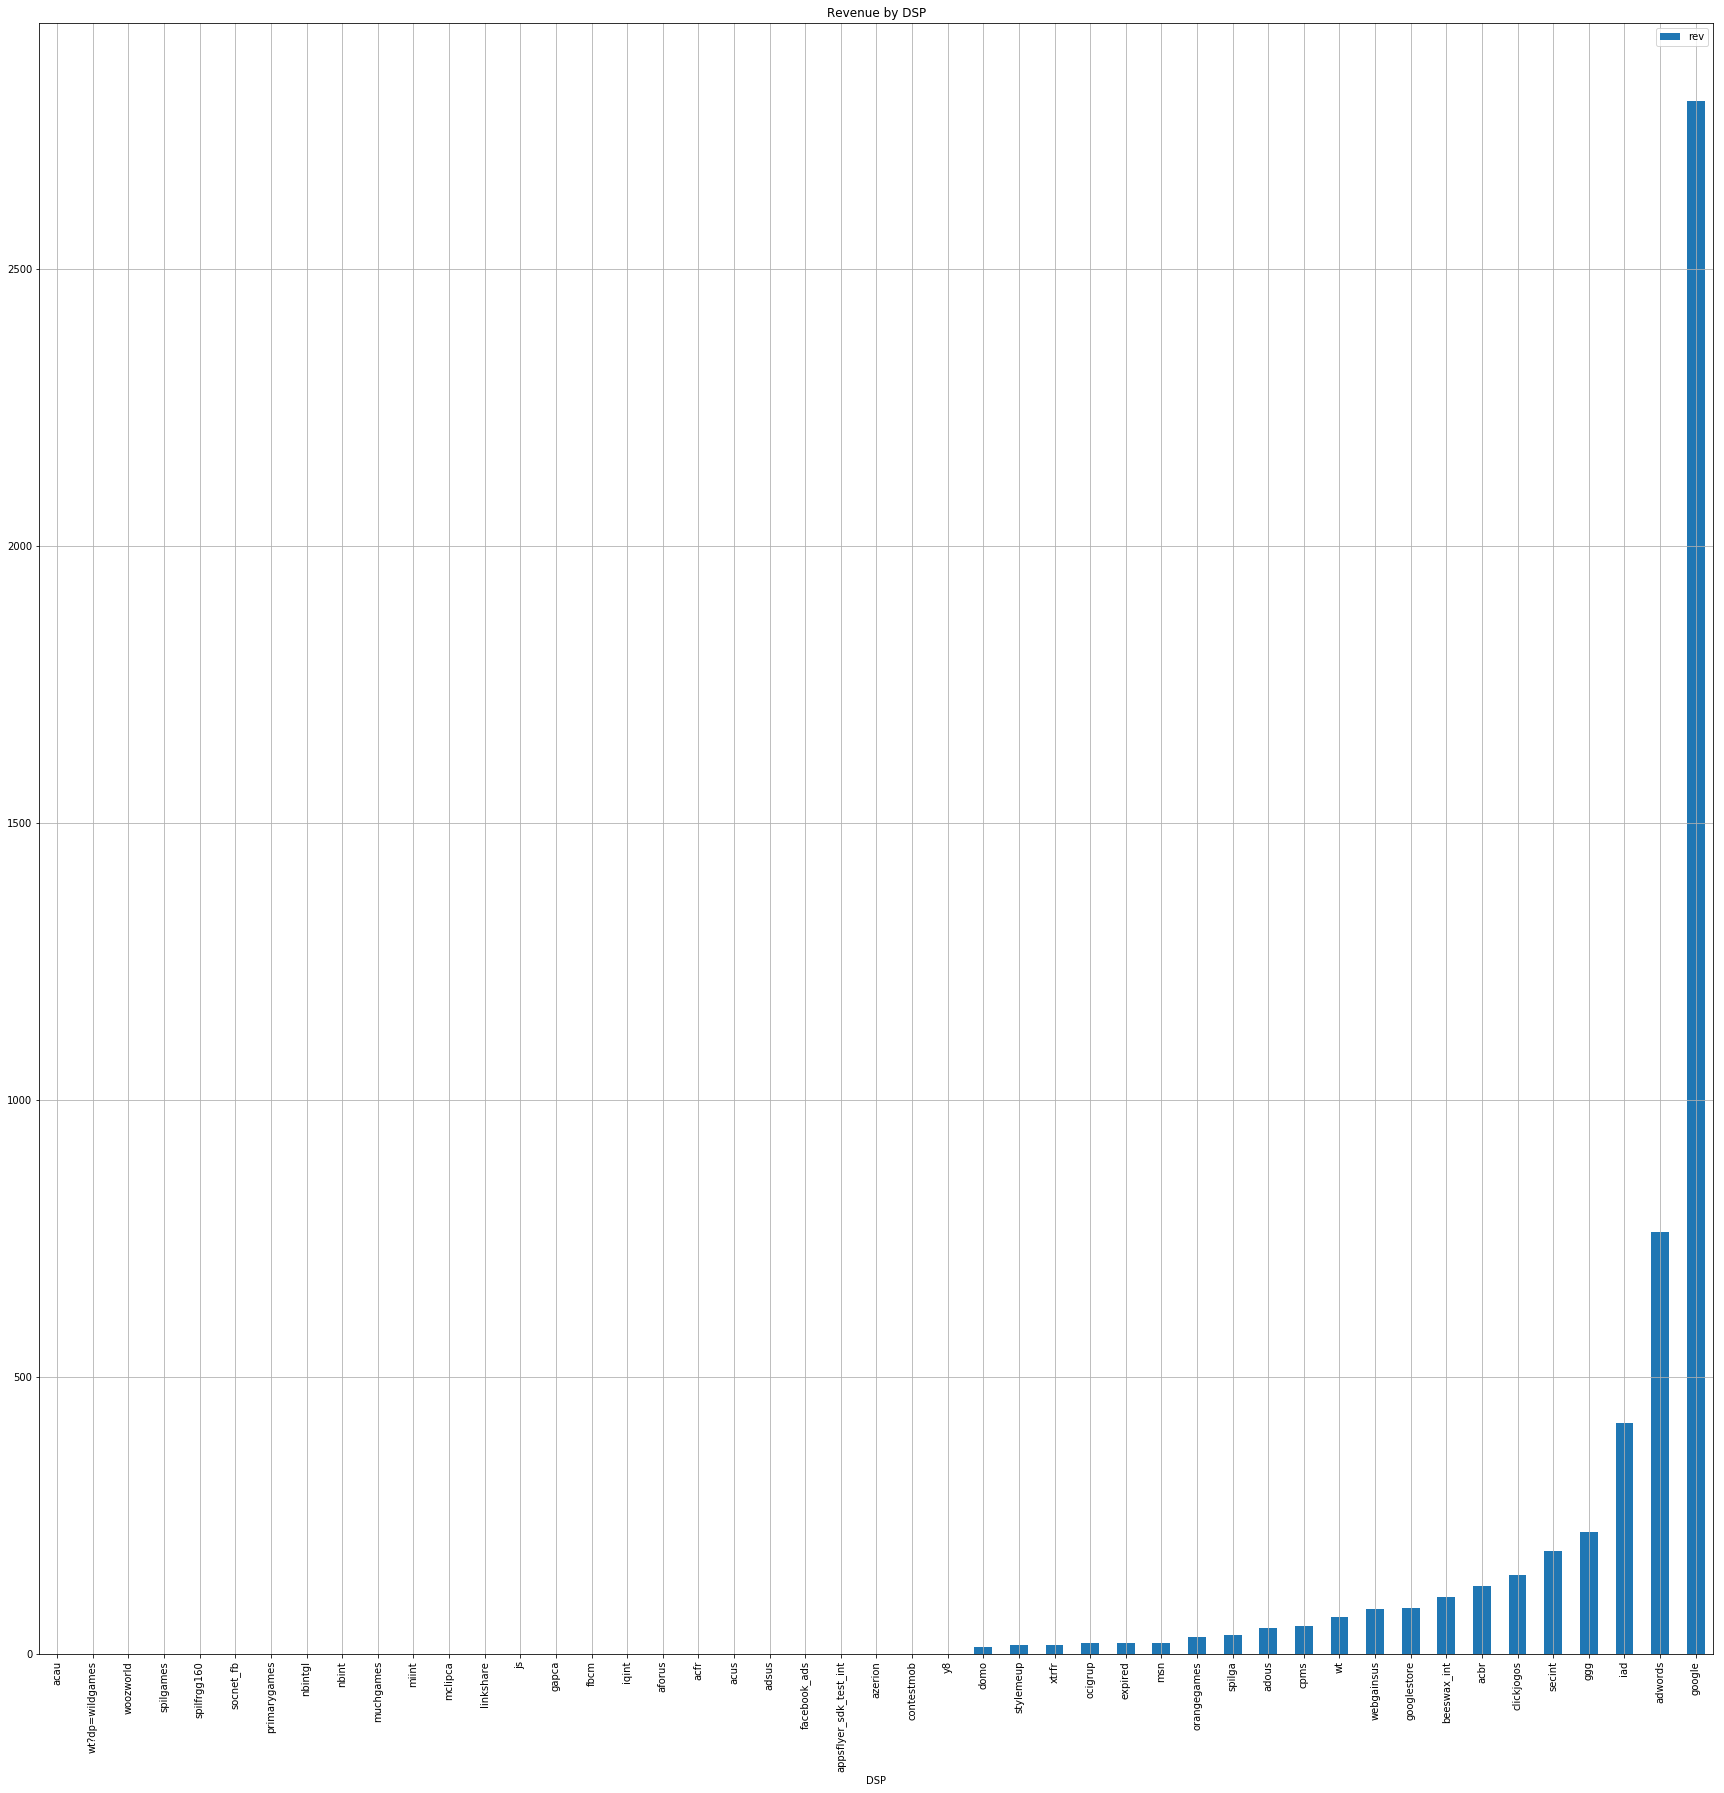

In [73]:
plt.rcParams['figure.figsize'] = [30, 30]

dsp_revenue = pd.read_sql_query("select dsp,sum(revenue) as rev from dbo.rtb_user_activity where dsp not like '%na%' group by dsp ", connection)
sorted_dsp = dsp_revenue.sort_values(by = ["rev"])
sorted_dsp.plot(kind ="bar", x = "dsp", y ="rev")

plt.title("Revenue by DSP")
plt.xlabel("DSP")
plt.grid()
plt.show()

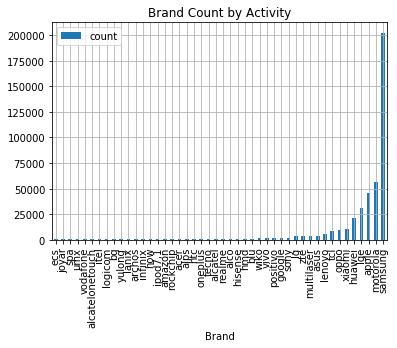

In [68]:
brand = pd.read_sql_query("select device_brand,count(*) as count from dbo.rtb_user_activity group by device_brand having count(*)>200", connection)
sorted_brand = brand.sort_values(by = ["count"]) 
sorted_brand.plot(kind ="bar", x = "device_brand", y ="count")
plt.title("Brand Count by Activity")
plt.xlabel("Brand")
plt.grid()
plt.show()

In [ ]:
result, columns = client.execute(" select revenue_amount_micros as revenue, category from Wins_buffer wb where category not like '' ", with_column_types=True)
content = pd.DataFrame(result, columns=[tuple[0] for tuple in columns])
content_sorted = content.sort_values(by = ["revenue"]) 
content_sorted.plot(kind = "bar", x = 'category', y = 'revenue')
plt.title("Content Revenues")
plt.grid()
plt.show()


In [3]:
def query_function(category):
    query_start = "select category, sum(win_cost_micros_usd) as revenue from Wins_buffer WHERE category like'" 
    query_end = "'group by category"
    query = query_start + category + query_end
    
    result, columns = client.execute(query, with_column_types=True)
    
    df_category = pd.DataFrame(result, columns=[tuple[0] for tuple in columns])
    
    return 